## TFY4345 - Øving 1, Pendel

Av Thomas Parelius

In [132]:
#Initalisering og definisjon av startverdier
l = 1.0;
g = 9.81;
m = 1.0;
theta0 = 0.2;
omega0 = 0.0;
En0 = 0.2;#P = mgh = 0.2

In [133]:
import numpy as np
import math

#arrayInit er en funksjon som initialiserer arrayene som blir brukt i de numeriske beregningene.
#og gir startverdier for energi, vinkel, og vinkelhastighet.
def arrayInit (dt):
    sek = 10.0;
    t = np.arange(0.0, sek+dt, dt);
    N = len(t);
    
    #Eulers metode
    Eu_omega = np.zeros(N);
    Eu_omega[0] = omega0;
    Eu_theta = np.zeros(N);
    Eu_theta[0] = theta0;
    Eu_En = np.zeros(N);
    Eu_En[0] = En0; 
    
    #Euler-Cromers metode
    EC_theta = np.zeros(N);
    EC_theta[0] = theta0;
    EC_omega = np.zeros(N);
    EC_omega[0] = omega0;
    EC_En = np.zeros(N);
    EC_En[0] = En0;
    
    #Runge-Kutta 4
    RK_theta = np.zeros(N);
    RK_theta[0] = theta0;
    RK_omega = np.zeros(N);
    RK_omega[0] = omega0;
    RK_En = np.zeros(N);
    RK_En[0] = En0;
    RK_C = -(g/l);
    
    #Analytisk løsning
    An_omega = np.zeros(N);
    An_omega[0] = omega0;
    An_theta = np.zeros(N);
    An_theta[0] = theta0;
    An_En = np.zeros(N);
    An_En[0] = En0;
    return dt,Eu_omega, Eu_theta, Eu_En,EC_omega, EC_theta, EC_En,RK_omega, RK_theta, RK_En;

In [134]:
def num(dt,Eu_omega, Eu_theta, Eu_En,EC_omega, EC_theta, EC_En,RK_omega, RK_theta, RK_En):
    #Numeriske beregninger
    for i in range(0, N-1):
        #Eulers metode
        Eu_omega[i+1] = Eu_omega[i] - (g/l)*Eu_theta[i]*dt;
        Eu_theta[i+1] = Eu_theta[i] + Eu_omega[i]*dt;
        Eu_En[i+1] = Eu_En[i] + 0.5*m*g*l*dt**2.0*(Eu_omega[i]**2.0 + (g/l)*Eu_theta[i]**2.0);
        
        #Euler-Cromer beregninger
        EC_omega[i+1] = EC_omega[i] - (g/l)*EC_theta[i]*dt;
        EC_theta[i+1] = EC_theta[i] + EC_omega[i+1]*dt;
        EC_En[i+1] = EC_En[i] + 0.5*m*g*l*dt**2.0*(EC_omega[i]**2.0 + (g/l)*EC_theta[i]**2.0);
        
        #Runge-Kutta 4
        theta_k1 = dt*RK_omega[i];
        theta_k2 = dt*(RK_omega[i] + theta_k1/2.0);
        theta_k3 = dt*(RK_omega[i] + theta_k2/2.0);
        theta_k4 = dt*(RK_omega[i] + theta_k3);
        RK_theta[i+1] = RK_theta[i] + (1/6)*(theta_k1 + 2*theta_k2 + 2*theta_k3 + theta_k4);
        
        omega_k1 = dt* RK_theta[i]*RK_C;
        omega_k2 = dt*(RK_theta[i]*RK_C + omega_k1/2.0);
        omega_k3 = dt*(RK_theta[i]*RK_C + omega_k2/2.0);
        omega_k4 = dt*(RK_C*RK_theta[i] + omega_k3);
        RK_omega[i+1] = RK_omega[i]+(1/6)*(omega_k1 + 2*omega_k2 + 2*omega_k3+ omega_k4);
        
        RK_En[i+1] = RK_En[i] + 0.5*m*g*l*dt**2.0*(RK_omega[i]**2.0 + (g/l)*RK_theta[i]**2.0);
        
        
    #Analytiske beregninger
    for i in range(0, N):
        An_theta[i] = theta0*math.sin(math.sqrt(g/l)*t[i] + (math.pi/2.0));
        An_omega[i] = math.sqrt(g/l)*theta0*math.cos(math.sqrt(g/l)*t[i]+(math.pi/2.0));
        An_En[i] = 0.5*m*l**2.0*(An_omega[i]**2.0 + (g/l)*An_theta[i]**2.0);
    
    return dt,Eu_omega, Eu_theta, Eu_En,EC_omega, EC_theta, EC_En,RK_omega, RK_theta, RK_En;

In [135]:
#Plots
import matplotlib.pyplot as plt
import matplotlib.axis

def plots(dt,Eu_omega, Eu_theta, Eu_En,EC_omega, EC_theta, EC_En,RK_omega, RK_theta, RK_En):
    
    #plot av analytisk beregning.
    plt.plot(t, An_theta);
    plt.plot(t, An_En);
    plt.axis([0.0, sek, -0.4, 0.4]);
    plt.title('Analytiske verdier. Timestep = %1.4f' % dt);
    plt.xlabel('time (s)');
    plt.ylabel('Vinkel (rad), og energi (Joule)')
    plt.grid(True);
    
    #plot av Eulers metode
    plt.figure();
    plt.plot(t, Eu_theta);
    plt.plot(t, Eu_En);
    plt.axis([0.0, sek, -0.4, 0.4]);
    plt.title('Eulers metode. Timestep = %1.4f' % dt);
    plt.xlabel('time (s)');
    plt.ylabel('Vinkel (rad), og energi (Joule)')
    plt.grid(True);
    
    #plot av Euler-Cromers metode
    plt.figure();
    plt.plot(t, EC_theta);
    plt.plot(t, EC_En);
    plt.axis([0.0, sek, -0.4, 0.4]);
    plt.title('Euler-Cromers metode. Timestep = %1.4f' % dt);
    plt.xlabel('time (s)');
    plt.ylabel('Vinkel (rad), og energi (Joule)')
    plt.grid(True);
    
    
    #Plot av RK4
    plt.figure();
    plt.plot(t, RK_theta);
    plt.plot(t, RK_En);
    plt.axis([0.0, sek, -0.4, 0.4]);
    plt.title('RK4. Timestep = %1.4f' % dt);
    plt.xlabel('time (s)');
    plt.ylabel('Vinkel (rad), og energi (Joule)')
    plt.grid(True);
    plt.show()
    
    ##plot av Eulers , EC metode, og RK4, numerisk
    #plt.figure();
    #plt.plot(t, Eu_theta);
    #plt.plot(t, Eu_En);
    #plt.plot(t, EC_theta);
    #plt.plot(t, EC_En);
    #plt.plot(t, RK_theta);
    #plt.plot(t, RK_En)
    #plt.axis([0.0, sek, -0.4, 0.4]);
    #plt.title('RK4, Eulers- og Euler-Cromers metode. Timestep = %1.4f' % dt);
    #plt.xlabel('time (s)');
    #plt.ylabel('Vinkel (rad), og energi (Joule)')
    #plt.grid(True);
    #plt.show();
    
    return;

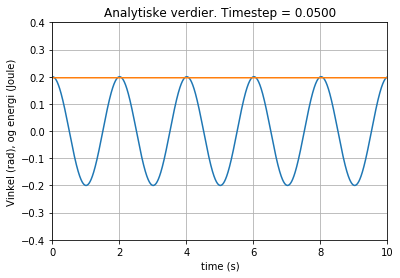

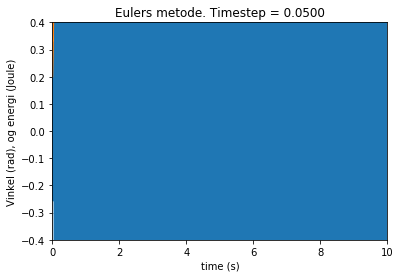

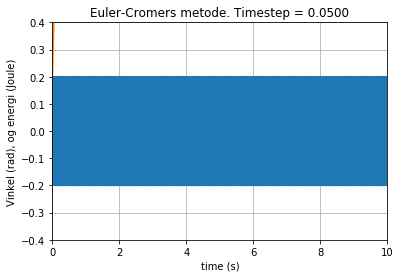

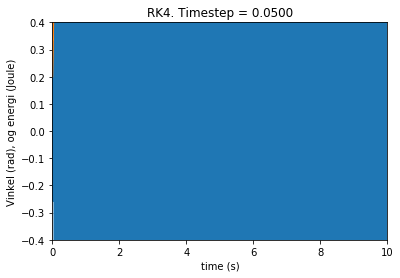

In [136]:
def calculate(dt):
    arrayInit(dt);
    num(dt,Eu_omega, Eu_theta, Eu_En,EC_omega, EC_theta, EC_En,RK_omega, RK_theta, RK_En);
    plots(dt,Eu_omega, Eu_theta, Eu_En,EC_omega, EC_theta, EC_En,RK_omega, RK_theta, RK_En);
    return;

calculate(0.05);

# Phase space:

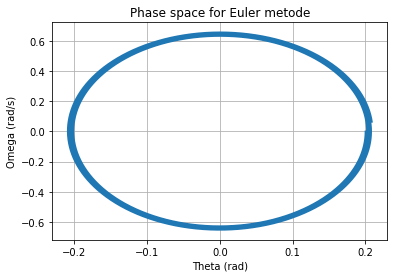

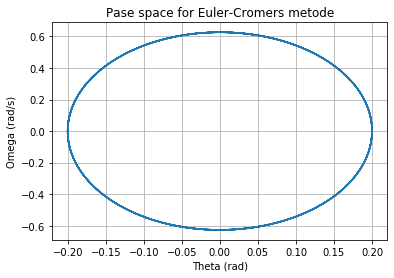

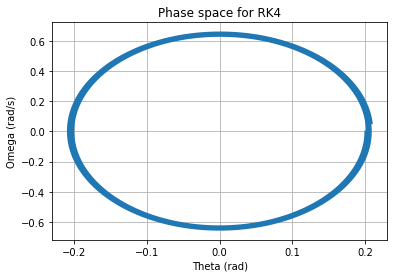

In [8]:
import matplotlib.pyplot as plt

#plot av phase space
plt.figure();
plt.title('Phase space for Euler metode');
plt.xlabel('Theta (rad)');
plt.ylabel('Omega (rad/s)')
plt.plot(Eu_theta, Eu_omega);
plt.grid(True);

plt.figure();
plt.title('Pase space for Euler-Cromers metode');
plt.xlabel('Theta (rad)');
plt.ylabel('Omega (rad/s)')
plt.plot(EC_theta, EC_omega);
plt.grid(True);

plt.figure();
plt.title('Phase space for RK4');
plt.xlabel('Theta (rad)');
plt.ylabel('Omega (rad/s)')
plt.plot(RK_theta, RK_omega);
plt.grid(True);

plt.show();